In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from geobr import read_municipality
from geobr import read_state
from unidecode import unidecode

In [2]:
frete = pd.read_excel('../BaseDados/f_bases_frete.xlsx', sheet_name="f_custos_frete",skiprows=2)

In [3]:
frete.head()

,Date de Cobrança,Data Emissão Nota Fiscal,Nota Fiscal,Conhecimento,Divisão,Modalidade,Tabela Aplicada,Tipo de Serviço,Tipo de Veiculo,Veiculo,...,Sefaz,Coleta,Despacho,Emex,Endereço Adicional,Entrega,Frete Canhoto,Frete Liquido,ICMS,Frete Bruto
0,2022-09-01,2022-06-06,368366,387394,EPD,RODOVIARIO,Convencional,DEVOLUCAO,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.428964
1,2022-09-01,2022-09-08,387739,168859,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.43,348.970000
2,2022-09-01,2022-09-12,388393,173870,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.43,348.970000
3,2022-09-01,2022-09-14,389290,177523,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.93,456.180000
4,2022-09-01,2022-09-16,390067,181634,AN,RODOVIARIO,Convencional,ENTREGA,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.26,132.320000


In [4]:
frete.columns

Index(['Date de Cobrança', 'Data Emissão Nota Fiscal', 'Nota Fiscal',
       'Conhecimento', 'Divisão', 'Modalidade', 'Tabela Aplicada',
       'Tipo de Serviço', 'Tipo de Veiculo', 'Veiculo', 'Processo',
       'Transportadora', 'CNPJ do Destinatario', 'Nome do Destinatario',
       'CNPJ do Remetente', 'Nome do Remetente', 'CNPJ (CALC)', 'UF (CALC)',
       'Cidade (CALC)', 'AGE?', 'Carro na Ponta?', 'Emergencial?', 'EMEX?',
       'Improdutiva?', 'Paletização?', 'Seg Fluvial?', 'Suframa?', 'TDE?',
       'TRT?', 'Peso', 'Range Peso', 'Volumes', 'Valor NF', 'Frete Peso',
       'Frete Valor', 'Ad Valorem', 'Gris', '%NF', 'TRT', 'AGE', 'Urg',
       'Valor Frete', 'Valor do Veiculo', 'TDE', 'Ajudante', 'Suframa',
       'Seguro Fluvial', 'Paletização', 'Pedagio', 'Canhoto', 'Carro na Ponta',
       'Sefaz', 'Coleta', 'Despacho', 'Emex', 'Endereço Adicional', 'Entrega',
       'Frete Canhoto', 'Frete Liquido', 'ICMS', 'Frete Bruto'],
      dtype='object')

In [5]:
frete['CNPJ do Destinatario'].value_counts()

CNPJ do Destinatario
45453214001808    3665
65817900000171    1465
56998701003301    1301
5782733000149     1296
5782733000300     1147
                  ... 
75299437749          1
25240038848          1
26067292858          1
9859975752           1
46374500017240       1
Name: count, Length: 931, dtype: int64

In [113]:
# Criando o DataFrame
df = pd.DataFrame(frete)

# Convertendo a coluna de data para o tipo datetime
df['Data Emissão Nota Fiscal'] = pd.to_datetime(df['Data Emissão Nota Fiscal'])

# Criando a coluna de semana
df['Semana'] = df['Data Emissão Nota Fiscal'].dt.isocalendar().week

# Agrupando por CNPJ e semana, contando o número de pedidos
grupo_cnpj_semana = df.groupby(['CNPJ do Destinatario', 'Semana']).size().reset_index(name='Número de Pedidos')

# Criando o novo DataFrame com pivotagem
novo_df = grupo_cnpj_semana.pivot(index='CNPJ do Destinatario', columns='Semana', values='Número de Pedidos').fillna(0)

# Obtendo a primeira cidade correspondente a cada CNPJ
cidade_cnpj = df.groupby('CNPJ do Destinatario')['Cidade (CALC)'].first().reset_index()

# Mesclando a informação da cidade com o DataFrame 'novo_df'
novo_df = novo_df.merge(cidade_cnpj, on='CNPJ do Destinatario')

In [114]:
novo_df['Frequente'] = -1
novo_df

,CNPJ do Destinatario,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,Cidade (CALC),Frequente
0,716244900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PR-MARINGA,-1
1,788129414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,-1
2,835704467,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RN-NATAL,-1
3,982968507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BA-SALVADOR,-1
4,1117456676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MG-BELO HORIZONTE,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,87958625000149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RS-PORTO ALEGRE,-1
270,88212113016014,0.0,4.0,2.0,1.0,5.0,6.0,7.0,6.0,1.0,...,2.0,4.0,4.0,5.0,3.0,3.0,0.0,0.0,RS-PASSO FUNDO,-1
271,88212113111947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RS-GRAVATAI,-1
272,92665611032290,3.0,2.0,6.0,7.0,9.0,10.0,11.0,7.0,9.0,...,11.0,4.0,13.0,6.0,6.0,4.0,0.0,0.0,RS-ELDORADO DO SUL,-1


In [115]:
def analise_frequencia(df, threshold):
    for indice, linha in df.iterrows():
        count = -1
        for coluna in df.columns:
            if linha[coluna] != 0:
                count += 1
        if count > (threshold * 52):
            df.loc[indice, 'Frequente'] = 1
        else:
            df.loc[indice, 'Frequente'] = 0
    return df

In [116]:
novo_df = analise_frequencia(novo_df,0.8)
novo_df

,CNPJ do Destinatario,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,Cidade (CALC),Frequente
0,716244900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,PR-MARINGA,0
1,788129414,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,0
2,835704467,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RN-NATAL,0
3,982968507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BA-SALVADOR,0
4,1117456676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MG-BELO HORIZONTE,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,87958625000149,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RS-PORTO ALEGRE,0
270,88212113016014,0.0,4.0,2.0,1.0,5.0,6.0,7.0,6.0,1.0,...,2.0,4.0,4.0,5.0,3.0,3.0,0.0,0.0,RS-PASSO FUNDO,1
271,88212113111947,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RS-GRAVATAI,0
272,92665611032290,3.0,2.0,6.0,7.0,9.0,10.0,11.0,7.0,9.0,...,11.0,4.0,13.0,6.0,6.0,4.0,0.0,0.0,RS-ELDORADO DO SUL,1


In [117]:
novo_df['Frequente'].value_counts()

Frequente
0    211
1     63
Name: count, dtype: int64

In [118]:
novo_df = novo_df[novo_df['Frequente']==1]

In [138]:
def contagem_pedido(CNPJ_alvo):
    meses = list(range(1, 13)) 
    semanas = list(range(1,52))
    df = frete[frete['CNPJ do Destinatario'] == CNPJ_alvo]
    df = df[['Data Emissão Nota Fiscal', 'Nota Fiscal', 'CNPJ do Destinatario']]
    df['Mes'] = df['Data Emissão Nota Fiscal'].dt.month 
    contagem_por_mes = df['Mes'].value_counts().sort_index()
    # Reindexe a contagem por semana para incluir todas as semanas possíveis e atribua 0 às semanas ausentes
    contagem_por_mes = contagem_por_mes.reindex(meses, fill_value=0)
    df['semana'] = df['Data Emissão Nota Fiscal'].dt.isocalendar().week 
    contagem_por_semana = df['semana'].value_counts().sort_index()
    # Reindexe a contagem por semana para incluir todas as semanas possíveis e atribua 0 às semanas ausentes
    contagem_por_semana = contagem_por_semana.reindex(semanas, fill_value=0)

    """
    # Cria o gráfico de linha
    plt.figure(figsize=(8, 6))
    plt.plot(meses, contagem_por_mes, marker='o', linestyle='-', color='blue')
    plt.title('Contagem de pedidos por mês')
    plt.xlabel('Mês')
    plt.ylabel('Quantidade de pedidos')
    plt.grid(True)
    plt.xticks(meses)
    plt.tight_layout()

    # Mostra o gráfico
    plt.show()
    """

    # Cria o gráfico de linha
    plt.figure(figsize=(8, 6))
    plt.plot(semanas, contagem_por_semana, marker='o', linestyle='-', color='blue')
    plt.title('Contagem de pedidos por semana')
    plt.xlabel('Semana')
    plt.ylabel('Quantidade de pedidos')
    plt.grid(True)
    plt.xticks(semanas)
    plt.tight_layout()

    # Mostra o gráfico
    plt.show()

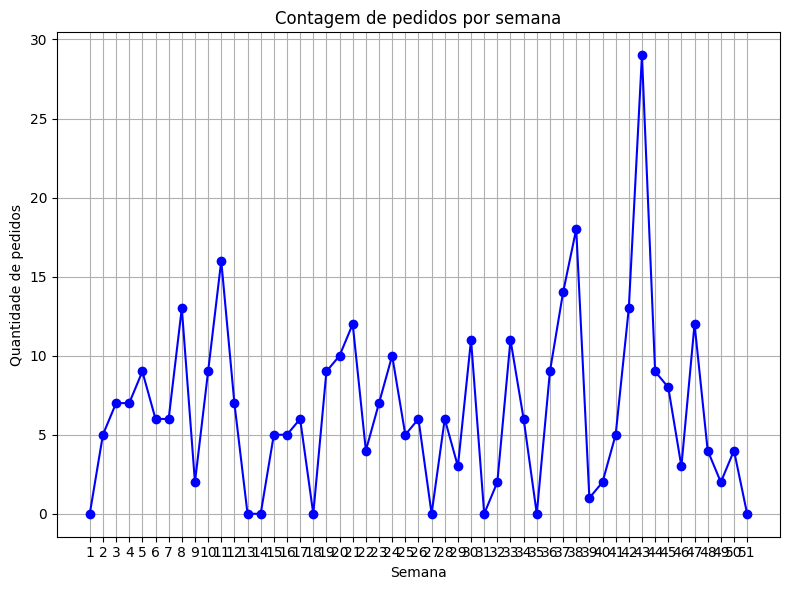

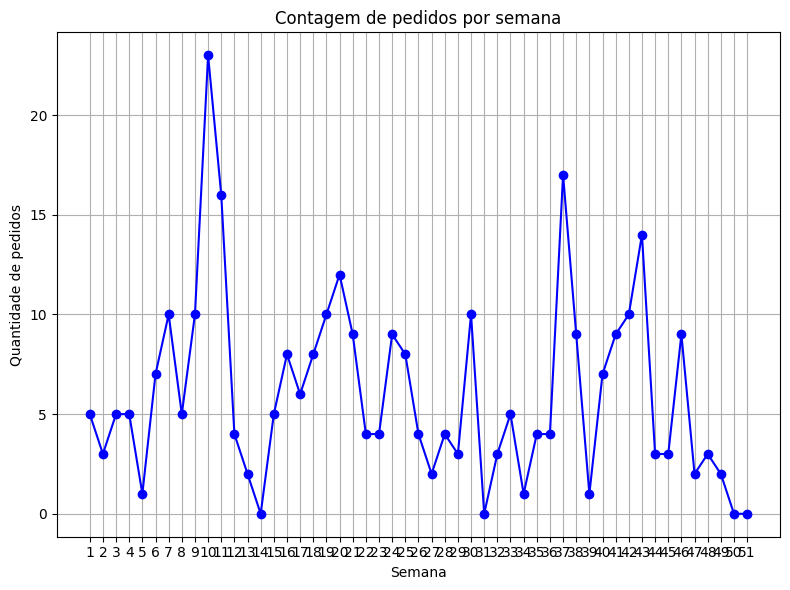

In [141]:
contagem_pedido(61940292005872)
contagem_pedido(45453214003177)

In [120]:
novo_df["Cidade (CALC)"] = novo_df["Cidade (CALC)"].str.replace(r'^[A-Z]+-', '', regex=True)
novo_df['Cidade (CALC)']

C:\Users\berna\AppData\Local\Temp\ipykernel_2852\3382793830.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



139                CONTAGEM
140                CAMACARI
141                CURITIBA
142            CACHOEIRINHA
143                  RECIFE
               ...         
253                  MANAUS
259                 COLOMBO
270             PASSO FUNDO
272         ELDORADO DO SUL
273    SAO JOSE DOS PINHAIS
Name: Cidade (CALC), Length: 63, dtype: object

In [97]:
municipio = read_municipality(code_muni="all", year=2022)

In [121]:
def padronizar_nome(nome):
    # Remove a acentuação e converte para maiúsculas
    return unidecode(nome).upper()

def obter_lat_long(df, cidade_col, lat_col, long_col, cache):
    for index, row in df.iterrows():
        cidade = row[cidade_col]

        if cidade in cache:
            latitude, longitude = cache[cidade]
            df.at[index, lat_col] = latitude
            df.at[index, long_col] = longitude
        else:
          try:
              # Use .loc para filtrar com base no nome da cidade
              linha = municipio.loc[municipio['name_muni'].apply(padronizar_nome) == cidade]

              if not linha.empty:
                  cidade_geometry = linha["geometry"].iloc[0]  # Assume que há apenas uma linha correspondente
                  latitude, longitude = cidade_geometry.centroid.y, cidade_geometry.centroid.x
                  df.at[index, lat_col] = latitude
                  df.at[index, long_col] = longitude
                  cache[cidade] = (latitude, longitude)  # Armazena no cache para evitar recálculo
              else:
                  print(f"Coordenadas não encontradas para {cidade}")
          except Exception as e:
              print(f"Erro na solicitação para {cidade}: {e}")

# Adicionando a coluna 'Cidades' ao DataFrame

# Coordenadas_cache
coordenadas_cache = {}  # Dicionário para armazenar as coordenadas já calculadas

# Obtendo latitude e longitude usando geopandas e geobr
obter_lat_long(novo_df, 'Cidade (CALC)', 'lat', 'long', coordenadas_cache)

C:\Users\berna\AppData\Local\Temp\ipykernel_2852\3720570043.py:21: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\berna\AppData\Local\Temp\ipykernel_2852\3720570043.py:22: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [122]:
# Remoção de linhas com latitudes ou longitudes iguais a zero
novo_df = novo_df[(novo_df["lat"] != 0) & (novo_df["long"] != 0)]

# Seleção das colunas de latitude e longitude
coordenadas = novo_df[['lat', 'long', 'CNPJ do Destinatario']]

In [123]:
coordenadas

,lat,long,CNPJ do Destinatario
139,-19.887197,-44.083959,1206820000369
140,-12.666008,-38.206233,1206820000873
141,-25.477906,-49.288250,1206820000954
142,-6.089973,-47.841338,1206820001098
143,-8.039206,-34.933053,1206820001179
...,...,...,...
253,-2.626007,-60.259577,61940292006682
259,-25.306310,-49.188007,79430682025540
270,-28.268902,-52.452522,88212113016014
272,-30.078130,-51.499123,92665611032290


In [126]:
import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point

# Criação de GeoDataFrame a partir do DataFrame
geometry = [Point(xy) for xy in zip(novo_df['long'], novo_df['lat'])]
geo_df = gpd.GeoDataFrame(novo_df, geometry=geometry, crs='EPSG:4326')

# Configurações do mapa
fig= px.scatter_geo(geo_df,
                     lat='lat',
                     lon='long',
                     text = 'CNPJ do Destinatario',
                     size_max=50,
                     title='Clusters em um Mapa',
                     projection='natural earth')

# Configurações adicionais para tornar o gráfico interativo
fig.update_geos(resolution=50, showcoastlines=True, coastlinecolor='black', showland=True, showcountries=True, landcolor='lightgray')
fig.update_layout(geo=dict(projection_scale=7), margin=dict(l=0, r=0, t=40, b=0),showlegend=True)

# Exibição do gráfico interativo
fig.show()


c:\Users\berna\AppData\Local\Programs\Python\Python311\Lib\site-packages\geopandas\geodataframe.py:34: ShapelyDeprecationWarning:

The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.



In [125]:
print(frete[frete['CNPJ do Destinatario']==61585865212244])
print(frete[frete['CNPJ do Destinatario']==45453214003177])

      Date de Cobrança Data Emissão Nota Fiscal  Nota Fiscal Conhecimento  \
3322        2022-09-01               2022-09-20       390806       184597   
3323        2022-09-01               2022-09-20       390621       185261   
3324        2022-09-01               2022-09-20       390756       185261   
3325        2022-09-01               2022-09-20       390807       185463   
3326        2022-09-01               2022-09-21       391240       187246   
...                ...                      ...          ...          ...   
55823       2023-10-01               2023-10-30       455376       781187   
55824       2023-10-01               2023-10-30       455083       781337   
55825       2023-10-01               2023-10-30       455084       781337   
55826       2023-10-01               2023-10-30       455085       781337   
55827       2023-10-01               2023-10-30       455086       781337   

      Divisão  Modalidade Tabela Aplicada Tipo de Serviço Tipo de Veiculo  